## 2. Neural Network Classification with PyTorch

classification involves predicting whether something is one thing or another (there can be multiple choices for things) 
you should know this dumbass

### 1. Make Classification Data and Get it Ready

In [21]:
import sklearn
from sklearn.datasets import make_circles

In [22]:
#make 1000 samples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
                    noise = 0.03, #introduces some random noise
                    random_state=42) #reproducibility

In [23]:
len(X), len(y)

(1000, 1000)

In [24]:
print(f"5 sampels from X: \n{X[:5]}")
print(f"5 sampels from y: \n{y[:5]}")

5 sampels from X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
5 sampels from y: 
[1 1 1 1 0]


In [25]:
X.shape

(1000, 2)

In [26]:
y.shape #y is a vector

(1000,)

In [27]:
X #X looks like a 1000 x 2 matrix

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [28]:
#make a dataframe of circle data
import pandas as pd
circles =pd.DataFrame({"X1": X[:,0], 
                     "X2": X[:,1],
                     "label": y})

In [29]:
circles

X1        X2  label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

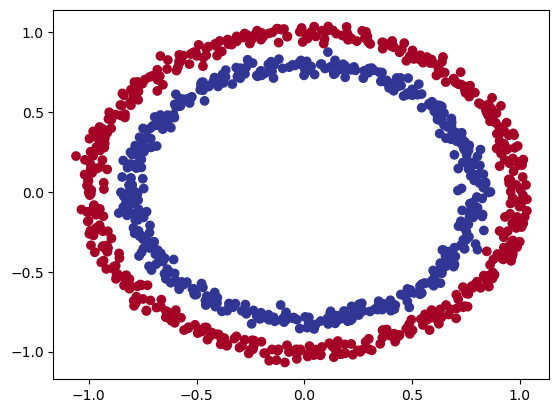

In [30]:
#lets visualize our data another way
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], 
            y=X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu)

therefore, we now know that we're trying to classify whether the dots plotted based on (x,y) is in circle 1 or circle 2

### 1.1 Check Input and Output Shapes

we need out data to be in tensors to use PyTorch

In [31]:
X.shape, y.shape

((1000, 2), (1000,))

In [32]:
#view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for 1 sample of X: {X_sample} and for y: {y_sample}")
print(f"Shape of sample x: {X_sample.shape}, shape of sample y: {y_sample.shape}")

Values for 1 sample of X: [0.75424625 0.23148074] and for y: 1
Shape of sample x: (2,), shape of sample y: ()


### 1.2 Turn Data into Tensors and Create Train and Test Splits


In [33]:
#turn data into tensors
import torch

X = torch.from_numpy(X).type(torch.float32) #cast into float 32 tensor
y = torch.from_numpy(y).type(torch.float32) #cast into float 32 tensor

In [34]:
type(X)

torch.Tensor

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [37]:
torch.manual_seed(42)

# 2. Building a Model

let's build a model to classify our blue and red dots

to do so we need to:
1. set up device agnostic code for GPU acceleration
2. construct a model (subclass the `nn.Module`)
3. define a loss func and optimizer
4. create training and test loop

In [42]:
import torch
from torch import nn

#1. set up agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [43]:
#2. construct a module using nn.Module
#subclass nn.Module (almost all modules in PyTorch subclass in nn.Module)
#create 2 nn.Linear() layers taht are capable of handling the shapes of our data
#define a forward() method that outlines the forward pass of the model
#instantiate an instance of our model class and send it to target device

In [44]:
#subclass nn.Module (almost all modules in PyTorch subclass in nn.Module)
class circle_model(nn.Module):
    def __init__(self):
        super().__init__()

        #2. create 2 nn.Linear() layers that can input the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, #takes in 2 features and upscales to 8 features
                               out_features=8,
                               )
        self.layer_2 = nn.Linear(in_features=8, #takes in 8 features from previous layer and outputs 1 value
                                 out_features=1) #(output is same shape as y)
        
    #3. define forward() method for forward pass
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x)) #x goes from layer 1 into layer 2, then layer 2 outputs result
    
#4. instantiate an instance of our model and send it to target device
model = circle_model().to(device)
model

DeferredCudaCallError: CUDA call failed lazily at initialization with error: module 'torch' has no attribute 'version'

CUDA call was originally invoked at:

  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\Admin\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
    self._run_once()
  File "c:\Users\Admin\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
    handle._run()
  File "c:\Users\Admin\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
    await self.process_one()
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one
    await dispatch(*args)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
    await result
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
    await super().execute_request(stream, ident, parent)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
    reply_content = await reply_content
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
    res = shell.run_cell(
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
    return super().run_cell(*args, **kwargs)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
    result = self._run_cell(
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
    result = runner(coro)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_37544\1180605555.py", line 2, in <module>
    import torch
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\torch\__init__.py", line 1478, in <module>
    _C._initExtension(manager_path())
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\torch\cuda\__init__.py", line 238, in <module>
    _lazy_call(_check_capability)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\torch\cuda\__init__.py", line 235, in _lazy_call
    _queued_calls.append((callable, traceback.format_stack()))


In [45]:
next(model.parameters()).device

NameError: name 'model' is not defined

In [46]:
#lets replicate the model above using nn.Sequential()

model = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device)
model

DeferredCudaCallError: CUDA call failed lazily at initialization with error: module 'torch' has no attribute 'version'

CUDA call was originally invoked at:

  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "c:\Users\Admin\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
    self._run_once()
  File "c:\Users\Admin\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
    handle._run()
  File "c:\Users\Admin\anaconda3\Lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
    await self.process_one()
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one
    await dispatch(*args)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
    await result
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
    await super().execute_request(stream, ident, parent)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
    reply_content = await reply_content
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
    res = shell.run_cell(
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
    return super().run_cell(*args, **kwargs)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
    result = self._run_cell(
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
    result = runner(coro)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_37544\1180605555.py", line 2, in <module>
    import torch
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\torch\__init__.py", line 1478, in <module>
    _C._initExtension(manager_path())
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\torch\cuda\__init__.py", line 238, in <module>
    _lazy_call(_check_capability)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\torch\cuda\__init__.py", line 235, in _lazy_call
    _queued_calls.append((callable, traceback.format_stack()))


In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900],
                      [-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4310, -0.7000, -0.2732, -0.5424,  0.5802,  0.2037,  0.2929,  0.2236],
                     device='cuda:0')),
             ('1.weight',
              tensor([[-0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218,  0.1083]],
                     device='cuda:0')),
             ('1.bias', tensor([-0.0737], device='cuda:0'))])

In [ ]:
#make predictions
with torch.inference_mode():
    model.eval()

    X_test = X_test.type(torch.float32)
    pred = model(X_test.to(device))

print(f"Length of predictions: {len(pred)}, Shape: {pred.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape: torch.Size([200, 2])


In [ ]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

### 2.1 Setting Up Loss Function and Optimizer

which loss function or optimizer should we use? this is project dependent

ie. for regression we might want MSE or MAE but for classification we probably want binary cross entropy of categorical cross entropy

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function with built in

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.01)

In [73]:
#calculate accuracy - out of 100 examples, what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Training Model

to train our model, we need to need to build a training loop:

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward (backpropagation)
5. step optimizer (gradient descent)

### 3.1 Going from Raw Logits -> Predictions Probabilities -> Prediction Labels

our model outputs are going to be raw **logits**.

we can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (eg. sigmoid for binary classification and softmax for multiclass classification)

then we can convert our model's prediction probabilities to **prediction lable** by either rounding them or taking the argmax()

In [ ]:
#view the first 5 outputs of the forward pass on the test data
model.eval()

with torch.inference_mode():
    y_logits = model(X_test.to(device))[:5]
y_logits

tensor([[-0.4038],
        [-0.3557],
        [-0.4277],
        [-0.3974],
        [-0.2659]], device='cuda:0')

In [ ]:
#use sigmnoid activation function on model logits to turn them into predicitions probabilities
pred = torch.sigmoid(y_logits)
pred

tensor([[0.4004],
        [0.4120],
        [0.3947],
        [0.4019],
        [0.4339]], device='cuda:0')

In [ ]:
!nvidia-smi

Sat May 18 00:19:48 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   50C    P2             59W /  270W |    2592MiB /   8192MiB |     15%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 3.2 Building a Training and Testing Loop


In [ ]:
#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000 #set number of epochs

#put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    #set mode to training
    model.train()

    #1. forward pass
    y_logits = model(X_train.type(torch.float32)).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits -> prediction probabilities -> prediction labels

    #2. calculate loss/accuracy
    loss = loss_fn(y_logits, y_train.type(torch.float32)) #nn.BCEWithLogitsLoss expects raw logits as input

    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. back propagation
    loss.backward()

    #5. optimizer step (gradient descent)
    optimizer.step()


    ###Testing
    model.eval()
    with torch.inference_mode():
        #1. forward pass
        test_logits = model(X_test.type(torch.float32)).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. calc loss/accuracy
        test_loss = loss_fn(test_logits, 
                            y_test.type(torch.float32))
        test_acc = accuracy_fn(y_true=y_test.type(torch.float32), 
                      y_pred=test_pred)
        
    #print out whats happening
    print(f"Epoch: {epoch} | Loss: {loss} | : accuracy: {acc} | Test loss: {test_loss} | test acc: {test_acc}")

Epoch: 0 | Loss: 0.7080772519111633 | : accuracy: 50.0 | Test loss: 0.7090725302696228 | test acc: 50.0
Epoch: 1 | Loss: 0.7078694105148315 | : accuracy: 50.0 | Test loss: 0.7088683247566223 | test acc: 50.0
Epoch: 2 | Loss: 0.7076644897460938 | : accuracy: 50.0 | Test loss: 0.708666980266571 | test acc: 50.0
Epoch: 3 | Loss: 0.7074625492095947 | : accuracy: 50.0 | Test loss: 0.7084684371948242 | test acc: 50.0
Epoch: 4 | Loss: 0.7072632908821106 | : accuracy: 50.0 | Test loss: 0.7082727551460266 | test acc: 50.0
Epoch: 5 | Loss: 0.7070669531822205 | : accuracy: 50.0 | Test loss: 0.7080798149108887 | test acc: 50.0
Epoch: 6 | Loss: 0.7068732380867004 | : accuracy: 50.0 | Test loss: 0.7078895568847656 | test acc: 50.0
Epoch: 7 | Loss: 0.7066822648048401 | : accuracy: 50.0 | Test loss: 0.7077019810676575 | test acc: 50.0
Epoch: 8 | Loss: 0.7064939737319946 | : accuracy: 50.0 | Test loss: 0.7075170874595642 | test acc: 50.0
Epoch: 9 | Loss: 0.7063082456588745 | : accuracy: 50.0 | Test los

## 4. Make Predictions and Evaluate the Model

from the metrics, it looks like the model isn't learning anything

so lets inspect the predictions and make them visual

to do so, we're going to import a function called `plot_decision_boundary()`


In [ ]:
import requests
from pathlib import Path

#Download helper functions form learn Pytorch Repo if its not already downloaded
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, not downloading")
else:
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, not downloading


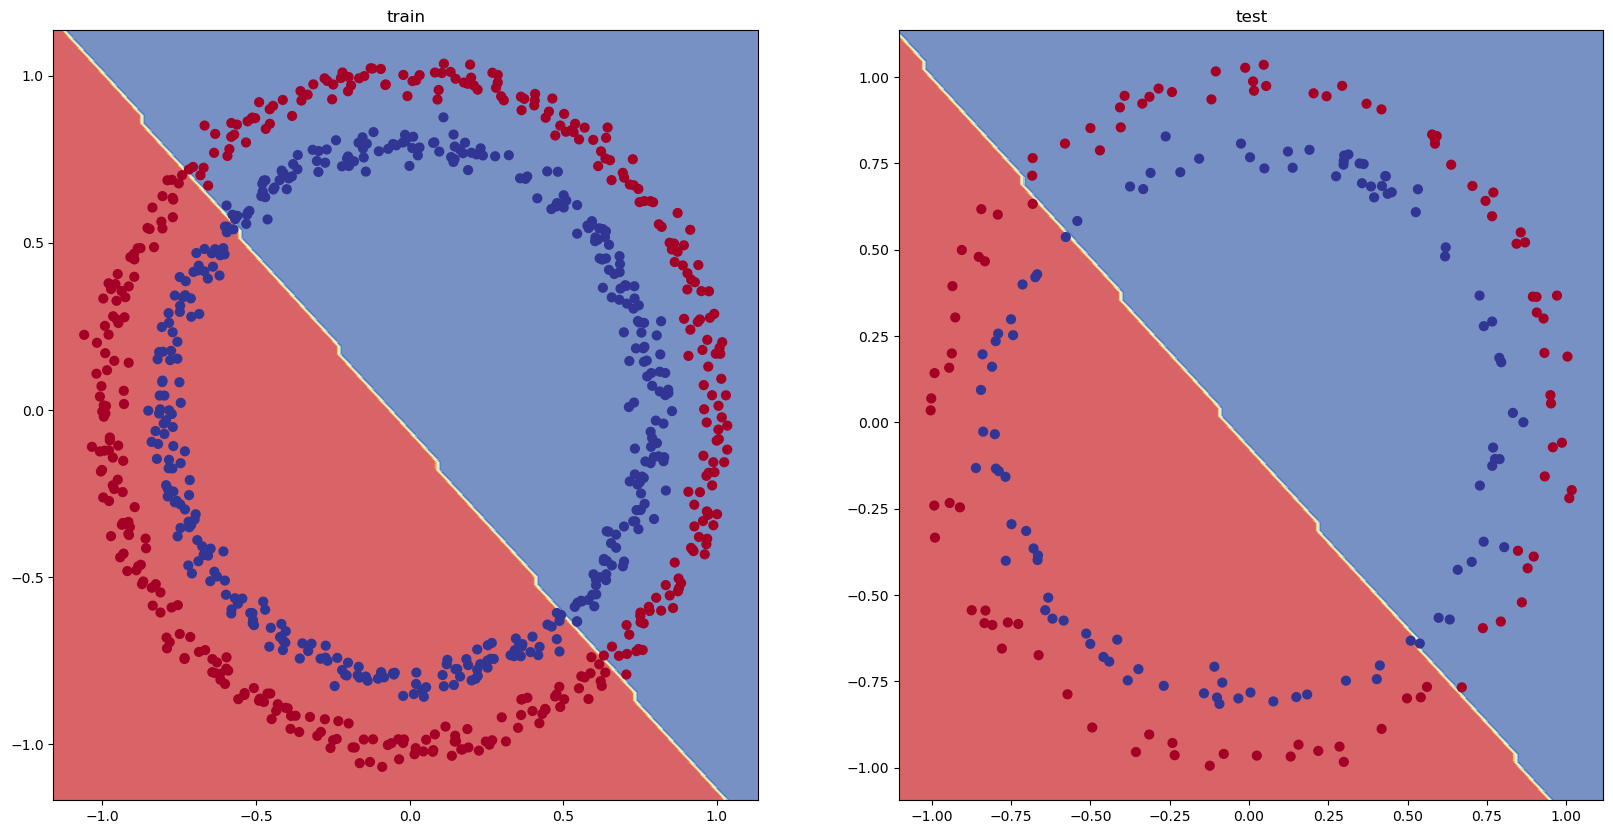

In [ ]:
#plot decision boundary of each model
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model, X_test, y_test)

## 5. Improving a model (from a model perspective)

* add more layers - give the model more changes to learn about the patterns in the data
* add more hidden units - go from 5 hidden units to 10 hidden units 
* fit for longer
* changing the activation functions
* changing the learning rate
* changing the loss function

these are all options from a model's perspective because they deal directly with the model, rather than the data

because these options are all values we (as machine learning engineers and data scientist) can change, they are referred to as **hyperparameters**

to improve our model we'll:
* increasing hidden units from 5->10
* increasing the number of layers from 2->3
* increase epochs from 1000 to 5000

In [ ]:

from torch import nn
class model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x))) #this way of writing operations leverages speed ups where possible behind the scenes

obj = model2().to(device)
obj

model2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#create a loss function
loss_fn = nn.BCEWithLogitsLoss()

#create an optimizer
optimizer = torch.optim.SGD(params=obj.parameters(),
                            lr = 0.01)

In [ ]:
#write a training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5000

#move data to target device
X_train, y_train = X_train.to(device).type(torch.float32), y_train.to(device).type(torch.float32)
X_test, y_test = X_test.to(device).type(torch.float32), y_test.to(device).type(torch.float32)

for epoch in range(epochs):
    obj.train()

    #forward step
    y_logits = obj(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #goes from logits -> prediction probabilities -> prediction labels

    #calc loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    #optimizer zero grad
    optimizer.zero_grad

    #backpropagation
    loss.backward()

    #optimizer step
    optimizer.step()

    ###Testing
    obj.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = obj(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #calc loss
        test_loss = loss_fn(test_logits, 
                            y_test)
        test_acc = accuracy_fn(y_true=y_test, 
                               y_pred=test_pred)
    
    #print out whats happening
    print(f"Epoch: {epoch} | Loss: {loss} | : accuracy: {acc} | Test loss: {test_loss} | test acc: {test_acc}")

Epoch: 0 | Loss: 0.6939550638198853 | : accuracy: 50.875 | Test loss: 0.6926106214523315 | test acc: 51.0
Epoch: 1 | Loss: 0.6939517259597778 | : accuracy: 50.875 | Test loss: 0.6926114559173584 | test acc: 51.0
Epoch: 2 | Loss: 0.6939449906349182 | : accuracy: 50.74999999999999 | Test loss: 0.6926127672195435 | test acc: 51.0
Epoch: 3 | Loss: 0.6939350962638855 | : accuracy: 50.74999999999999 | Test loss: 0.6926146745681763 | test acc: 51.0
Epoch: 4 | Loss: 0.6939221024513245 | : accuracy: 50.5 | Test loss: 0.6926172971725464 | test acc: 50.5
Epoch: 5 | Loss: 0.6939060091972351 | : accuracy: 50.625 | Test loss: 0.6926206946372986 | test acc: 50.5
Epoch: 6 | Loss: 0.6938870549201965 | : accuracy: 50.625 | Test loss: 0.6926250457763672 | test acc: 50.5
Epoch: 7 | Loss: 0.6938656568527222 | : accuracy: 50.625 | Test loss: 0.6926305890083313 | test acc: 51.0
Epoch: 8 | Loss: 0.6938416957855225 | : accuracy: 50.5 | Test loss: 0.6926374435424805 | test acc: 50.5
Epoch: 9 | Loss: 0.693815648

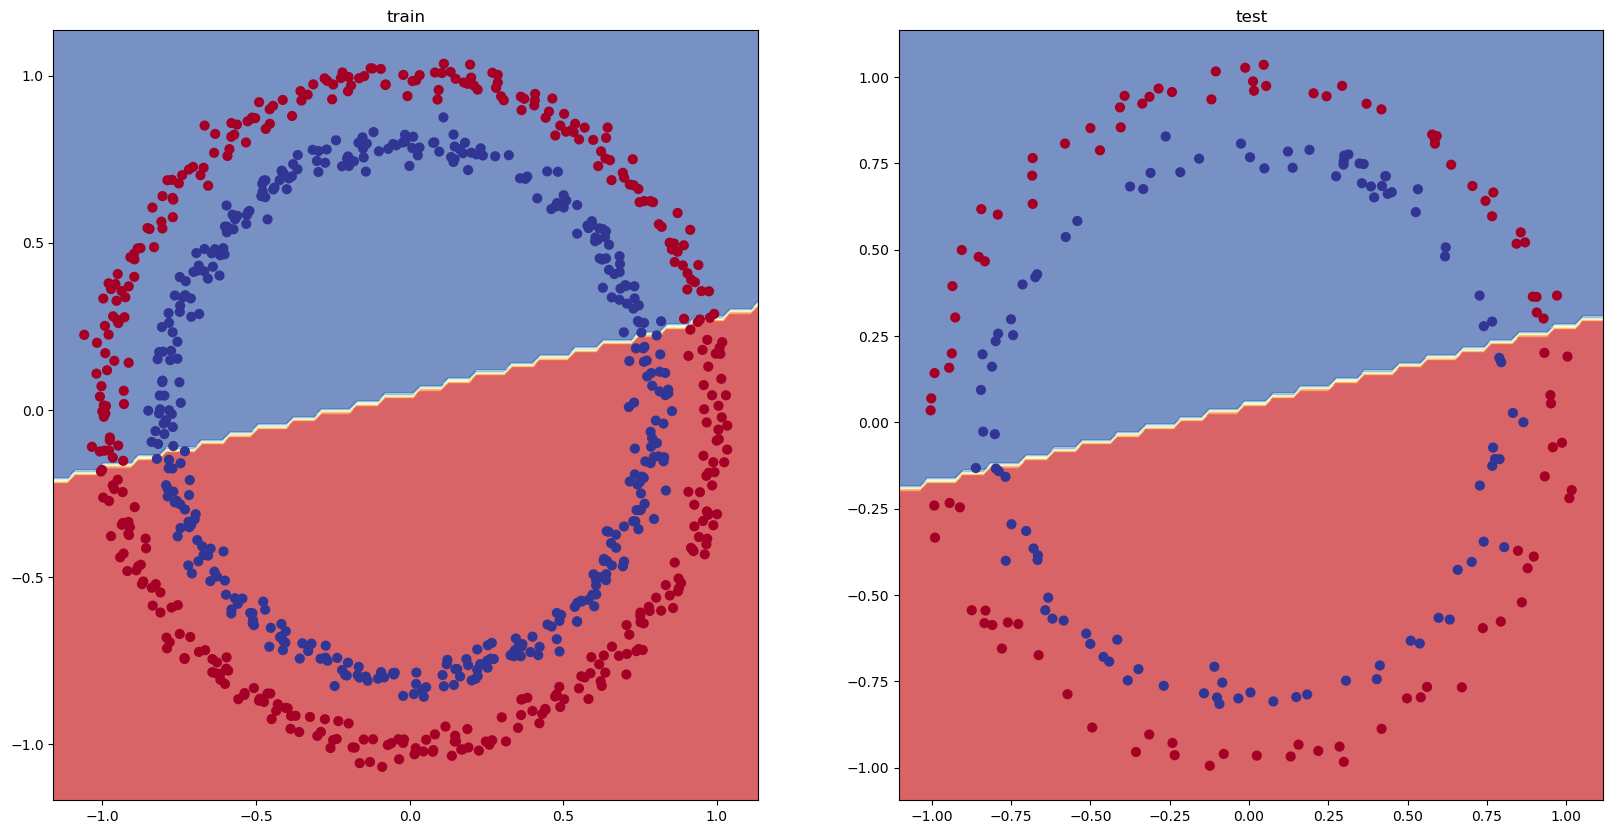

In [ ]:
#plot decision boundary of each model
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(obj, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(obj, X_test, y_test)

## 6. Non-Linear Data



In [ ]:
#build a model with non-linear activation functions

from torch import nn
class model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))#this way of writing operations leverages speed ups where possible behind the scenes

In [ ]:
non_lin = model3().to(device)

In [ ]:
#set up loss fn and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimzier = torch.optim.SGD(non_lin.parameters(),
                            lr = 0.01)

non_lin.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
#set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    non_lin.train()

    #forward pass
    y_logits = non_lin(X_train)
    y_pred = torch.round(torch.sigmoid(y_logits))

    #calc loss
    loss = loss_fn(y_logits, y_pred)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    #zero grad
    optimizer.zero_grad()

    #backprop
    loss.backward()

    #grad desc
    optimizer.step()

    ###Testing
    non_lin.eval()

    with torch.inference_mode():
        test_logits = non_lin(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=y_pred)

#print out whats happening
    print(f"Epoch: {epoch} | Loss: {loss} | : accuracy: {acc} | Test loss: {test_loss} | test acc: {test_acc}")

Epoch: 0 | Loss: 0.6820757985115051 | : accuracy: 40000.0 | Test loss: 0.6932516098022461 | test acc: 10000.0
Epoch: 1 | Loss: 0.6820757985115051 | : accuracy: 40000.0 | Test loss: 0.6932516098022461 | test acc: 10000.0
Epoch: 2 | Loss: 0.6820757985115051 | : accuracy: 40000.0 | Test loss: 0.6932516098022461 | test acc: 10000.0
Epoch: 3 | Loss: 0.6820757985115051 | : accuracy: 40000.0 | Test loss: 0.6932516098022461 | test acc: 10000.0
Epoch: 4 | Loss: 0.6820757985115051 | : accuracy: 40000.0 | Test loss: 0.6932516098022461 | test acc: 10000.0
Epoch: 5 | Loss: 0.6820757985115051 | : accuracy: 40000.0 | Test loss: 0.6932516098022461 | test acc: 10000.0
Epoch: 6 | Loss: 0.6820757985115051 | : accuracy: 40000.0 | Test loss: 0.6932516098022461 | test acc: 10000.0
Epoch: 7 | Loss: 0.6820757985115051 | : accuracy: 40000.0 | Test loss: 0.6932516098022461 | test acc: 10000.0
Epoch: 8 | Loss: 0.6820757985115051 | : accuracy: 40000.0 | Test loss: 0.6932516098022461 | test acc: 10000.0
Epoch: 9 |

In [ ]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 5000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 1 | Loss: 0.69289, Accuracy: 50.00% | Test Loss: 0.69312, Test Accuracy: 50.00%
Epoch: 2 | Loss: 0.69284, Accuracy: 50.00% | Test Loss: 0.69305, Test Accuracy: 50.00%
Epoch: 3 | Loss: 0.69279, Accuracy: 50.00% | Test Loss: 0.69299, Test Accuracy: 50.00%
Epoch: 4 | Loss: 0.69274, Accuracy: 50.00% | Test Loss: 0.69292, Test Accuracy: 50.00%
Epoch: 5 | Loss: 0.69268, Accuracy: 50.00% | Test Loss: 0.69286, Test Accuracy: 50.00%
Epoch: 6 | Loss: 0.69264, Accuracy: 50.00% | Test Loss: 0.69280, Test Accuracy: 50.00%
Epoch: 7 | Loss: 0.69259, Accuracy: 50.00% | Test Loss: 0.69274, Test Accuracy: 50.00%
Epoch: 8 | Loss: 0.69255, Accuracy: 50.00% | Test Loss: 0.69269, Test Accuracy: 50.00%
Epoch: 9 | Loss: 0.69251, Accuracy: 50.38% | Test Loss: 0.69264, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.69248, Accuracy: 50.50% | Test Loss: 0.69260, Test Accuracy: 50.00%
Epoch: 11 | Loss: 0.69244, Accuracy: 51.00

## 6.4 Evaluating Model 

In [ ]:
#make predictions
model_3.eval()

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

print(y_preds==y_test)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

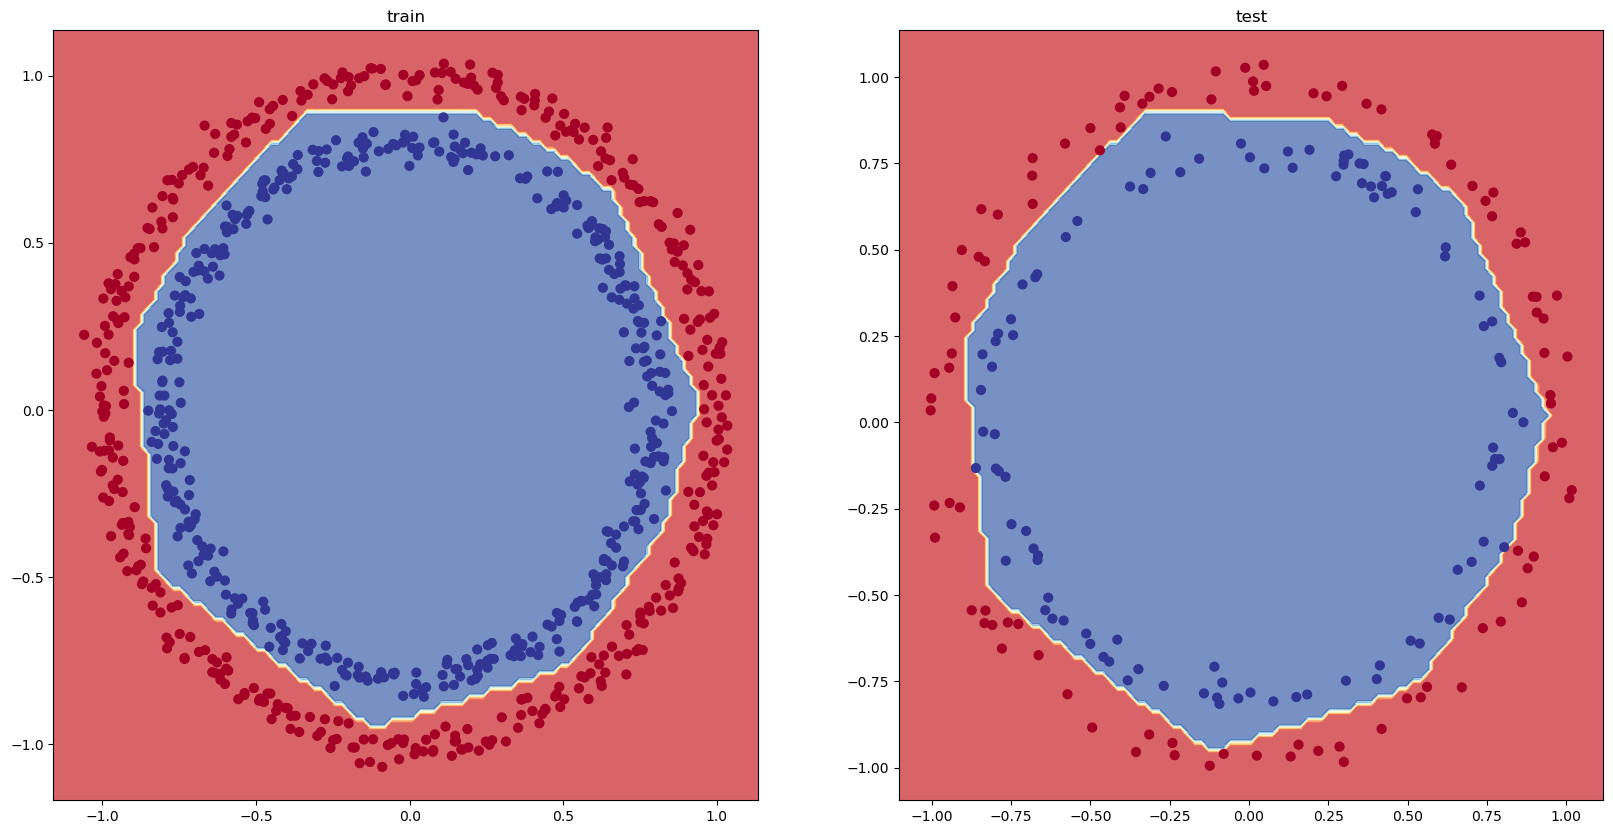

In [ ]:
import matplotlib.pyplot as plt 

#plot decision boundaries
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating Non Linear Activation Functions

NNs, tries to figure out patterns on its own through linear and non-linear functions

In [ ]:
#create a tensor
A = torch.arange(-10, 10, 1.0)
A.dtype

torch.float32

AttributeError: module 'torch' has no attribute '_utils'

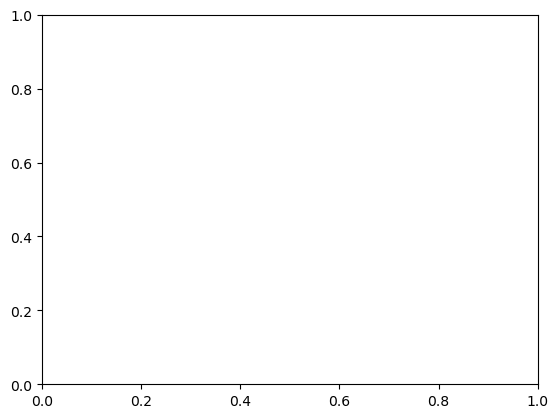

In [ ]:
plt.plot(A)

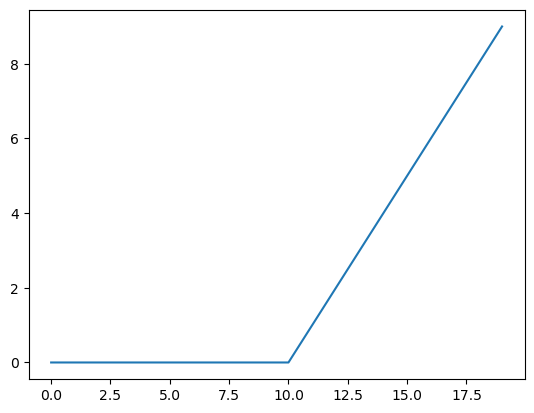

In [ ]:
plt.plot(torch.relu(A))

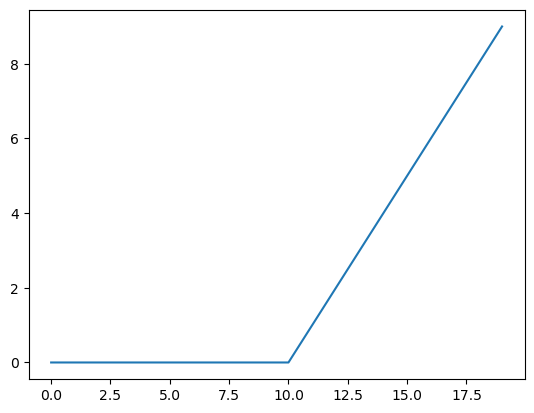

In [ ]:
def relu(x: torch.Tensor)->torch.Tensor:
    return torch.maximum(torch.tensor(0), x) #input must be tensors

plt.plot(relu(A))

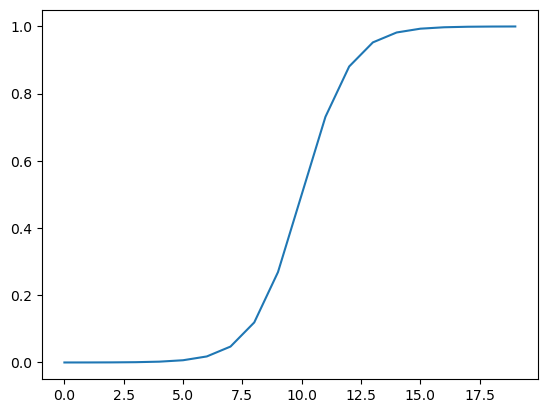

In [ ]:
#Sigmoid
plt.plot(torch.sigmoid(A))

In [ ]:
#lets recreate the sigmoid func
def sigmoid(x: torch.Tensor)->torch.Tensor:
    return 1/(1+torch.exp(-x))

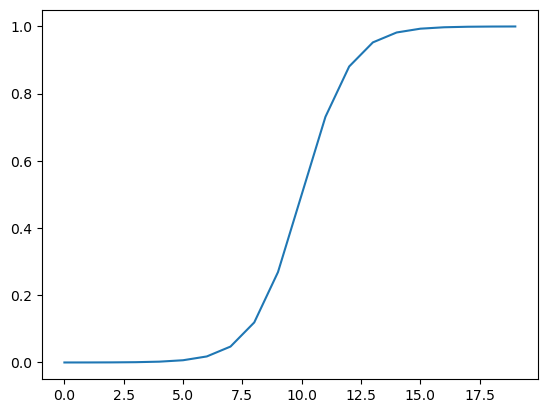

In [ ]:
plt.plot(sigmoid(A)) #sucessfully recreated the signmoid func

## 8. Putting it All Together with a Multiclass Classification Problem

now we have to deal with more than 2 possible classes

### 8.1 Creating Toy Multi-Class Dataset

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

#2. turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.float32)

#3. split data
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

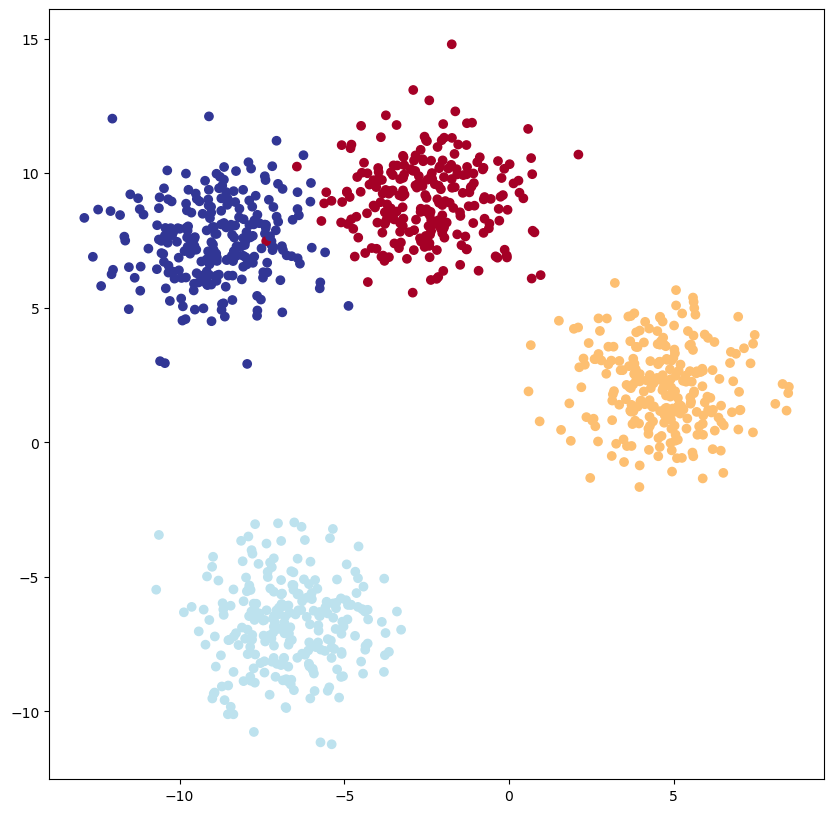

In [ ]:
#4. plot data
plt.figure(figsize=(10, 10))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap = plt.cm.RdYlBu)

## 8.2 Building a Multi-Class Classification Model in PyTorch

In [ ]:
#create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [31]:
#build MC classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    def forward(self, x: torch.Tensor)->torch.Tensor:
        return self.linear_layer_stack(x)
    
#create instance of blobmodel and send to device
model4 = BlobModel(input_features=2,output_features=4,hidden_units=8).to(device)
model4    

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
torch.unique(y_blob)

tensor([0., 1., 2., 3.])

In [ ]:
#create loss func and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model4.parameters(),
                            lr = 0.01)

### 8.4 Getting Prediction Probabilities for Multi-Class PyTorch Models

in order to evaluate and train and test our mdoels, we need to convert our model's outputs (logits) to prediction probabilities then to prediction labels

logits (raw output of the model) -> prediction probabilites (use `torch.softmax()`) -> prediction labels (use `torch.argmax()`)

In [ ]:
X_train=X_train.to(device)

model4.eval()
with torch.inference_mode():
    y_logits= model4(X_train)
y_logits

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        ...,
        [-0.2564, -1.2652, -1.0365, -0.3130],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.0502, -0.8423, -0.4798, -0.0988]], device='cuda:0')

In [ ]:
y_preds_prob = torch.softmax(y_logits, dim=1)
y_preds_prob

tensor([[0.3080, 0.3328, 0.1441, 0.2150],
        [0.3577, 0.1324, 0.1696, 0.3402],
        [0.3011, 0.1843, 0.2823, 0.2323],
        ...,
        [0.3613, 0.1317, 0.1656, 0.3414],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3272, 0.1482, 0.2129, 0.3117]], device='cuda:0')

In [ ]:
y_logits

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        ...,
        [-0.2564, -1.2652, -1.0365, -0.3130],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.0502, -0.8423, -0.4798, -0.0988]], device='cuda:0')

In [ ]:
y_preds = torch.argmax(y_logits, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0,
        3, 0, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 8.5 Create Training and Testin gLoop for Multi-Class PyTorch Model

In [ ]:
#fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs = 1000

#put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [ ]:
#loop through data

for epoch in range(epochs):
    model4.train()
    #forward step
    y_logits = model4(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) #go from prediction prob to class predictions

    #loss
    loss = loss_fn(y_logits, y_train.type(torch.LongTensor).to(device))
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    #zero grad
    optimizer.zero_grad()
    
    #back prop
    loss.backward()

    #step optimizer
    optimizer.step()

    ###testing mode
    model4.eval()
    with torch.inference_mode():
        #forward step
        test_logits = model4(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1) #go from prediction prob to class predictions

        #loss
        loss = loss_fn(test_logits, test_pred)
        acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

## 8.6 Making and Evaluating Predictions with PyTorch Multi-Class Model

In [ ]:
#test code
model4.eval()
with torch.inference_mode():
    test_logits = model4(X_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

print(y_test == test_pred)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

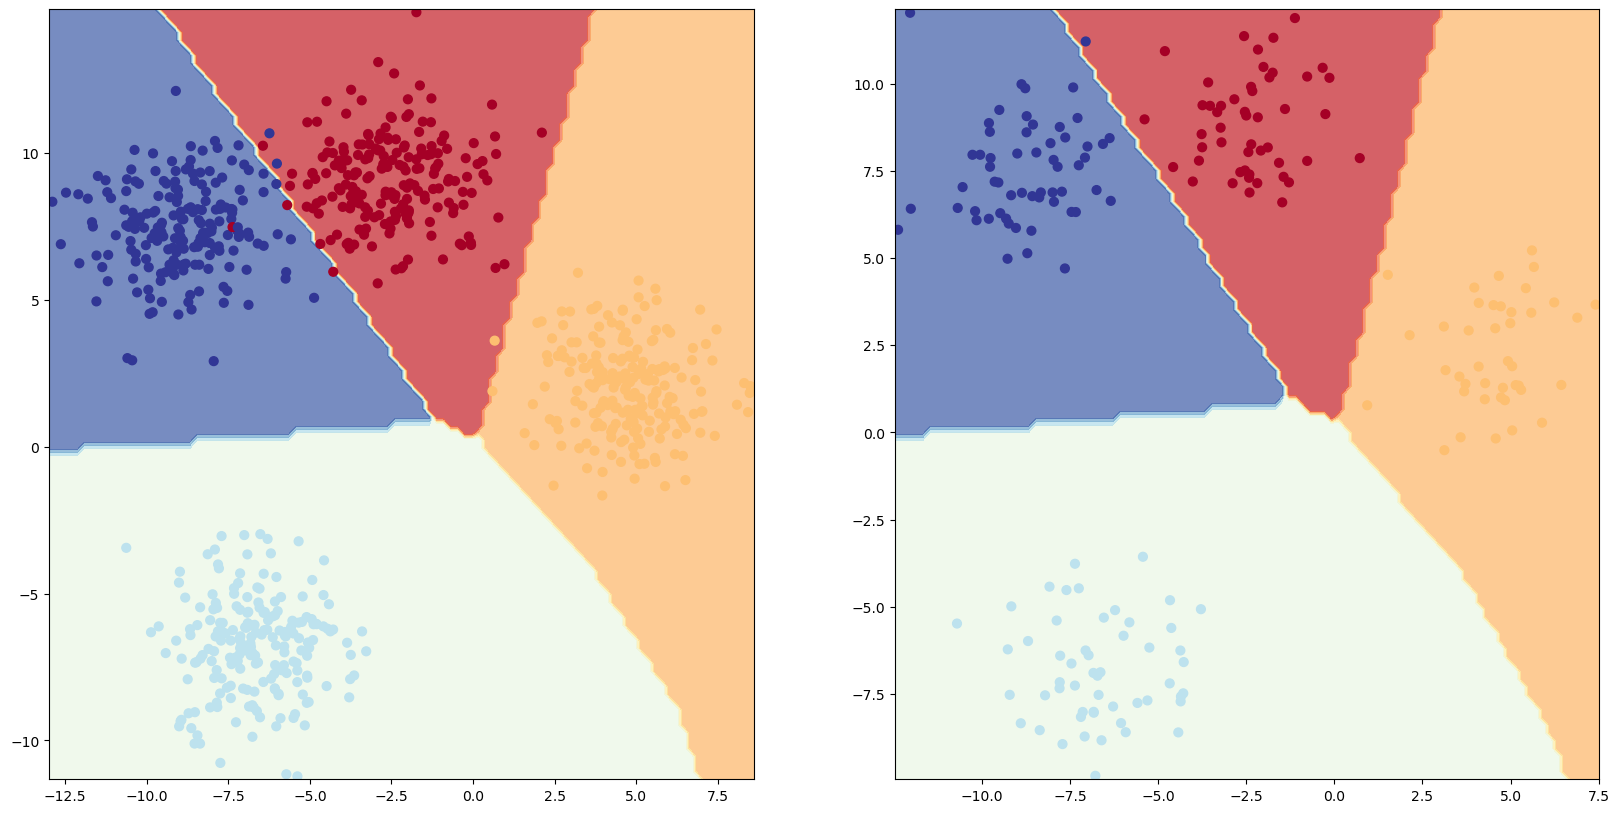

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plot_decision_boundary(model=model4, X=X_train, y=y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model=model4, X=X_test, y=y_test)

## 9. A Few More Classification Metrics

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-Score
* Confusion
* Classification Report


In [ ]:
from torchmetrics import Accuracy

#setup metric
torchmetrics_accuracy = Accuracy(task="multiclass",
                                 num_classes=NUM_CLASSES).to(device)


In [ ]:
test_pred.shape

torch.Size([200])

In [ ]:
y_test.shape

torch.Size([200])

In [ ]:
#calculate accuracy
torchmetrics_accuracy(test_pred, y_test)


tensor(0.9950, device='cuda:0')

# Exercises

In [ ]:
#1. 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from sklearn.datasets import make_moons

NUM_SAMPLES = 1000; 

X, y = make_moons(1000, noise=0.07, random_state=42)

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [ ]:
X.shape

torch.Size([1000, 2])

In [ ]:
y.shape

torch.Size([1000])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

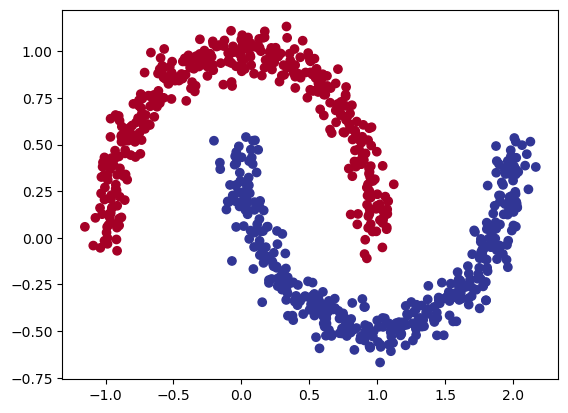

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.RdYlBu)

In [ ]:
#2.
class moon_mod(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
        
    def forward(self, x: torch.Tensor)->torch.Tensor:
        return self.layer_stack(x)
    
#create instance of model
model5 = moon_mod(input_features=2, output_features=1, hidden_units=8)
model5

moon_mod(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [ ]:
#3. 

#optimizer and loss func
loss_fn = nn.BCEWithLogitsLoss()

optimzier = torch.optim.SGD(params=model5.parameters(),
                            lr=0.01)

from torchmetrics import Accuracy
accuracy = Accuracy(task="binary", num_classes=2)

In [ ]:
#4.
epochs = 1000

for epoch in range(epochs):
    model5.train()
    #forward pass
    y_logits = model5(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    #loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    #zero grad
    optimizer.zero_grad()

    #back prop
    loss.backward()

    #optimizer step
    optimzier.step()

    ###testing mode
    model5.eval()
    with torch.inference_mode():
        #forward step
        test_logits = model5(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #loss
        test_loss = loss_fn(test_logits, test_pred)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 1 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 2 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 3 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 4 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 5 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 6 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 7 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 8 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 9 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 10 | Loss: 0.00000, Accuracy: 100.00% | Test Loss: 0.00000, Test Accuracy: 100.00%
Epoch: 11 | Loss: 0.

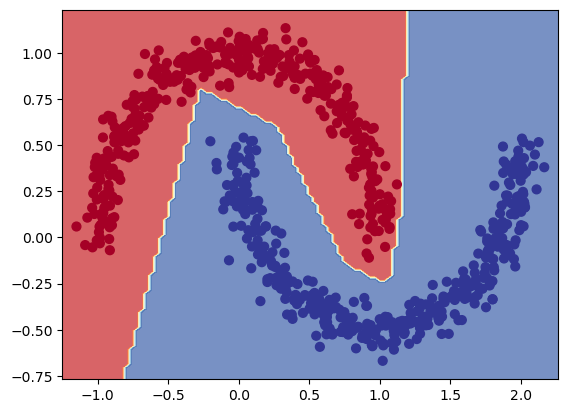

In [ ]:
plot_decision_boundary(model5, X_train, y_train)

In [2]:
model5.eval()
with torch.inference_mode():
    test_logits = test_logits = model5(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

NameError: name 'model5' is not defined

In [3]:
print(test_pred == y_test)

NameError: name 'test_pred' is not defined

In [4]:
#6.
import torch
import numpy as np

def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

A = torch.arange(-10, 10, 1.0)

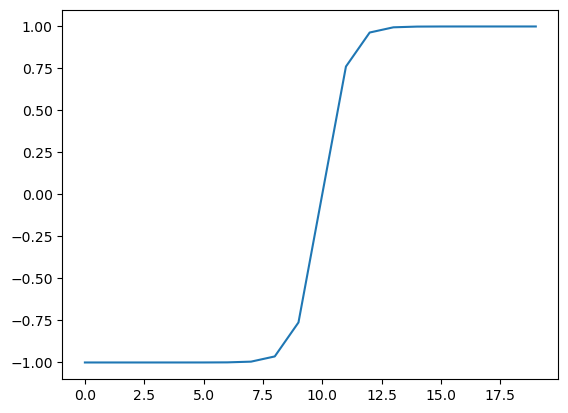

In [5]:
import matplotlib.pyplot as plt

plt.plot(tanh(A))

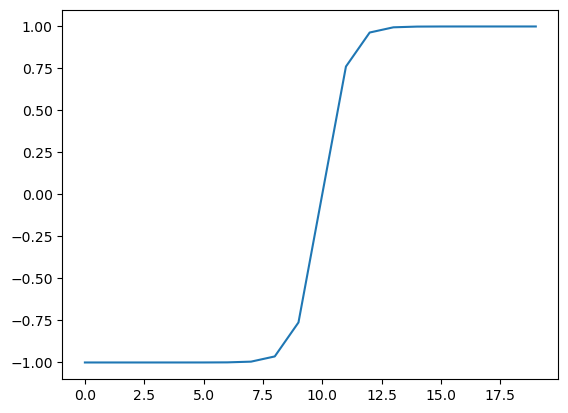

In [6]:
plt.plot(torch.tanh(A))

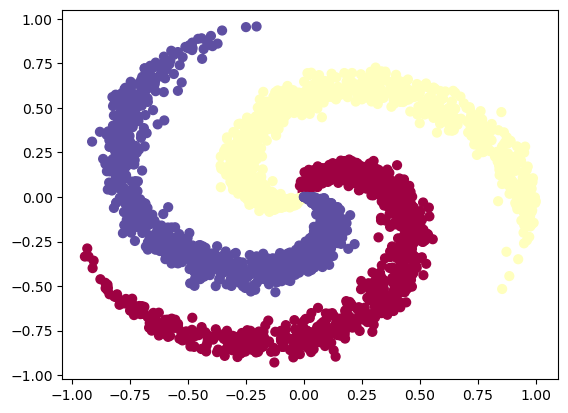

In [7]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [8]:
X.shape, y.shape
#x has 2 features, 3 classes, y has 1 feature/size of 1

((3000, 2), (3000,))

In [9]:
from sklearn.model_selection import train_test_split
#split test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((2400, 2), (600, 2))

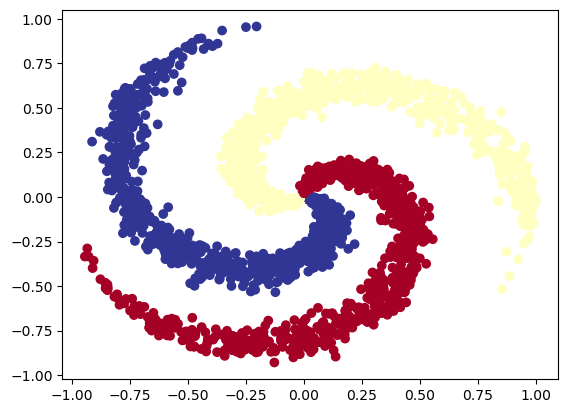

In [11]:
#visualize data
plt.scatter(X_train[:, 0], X_train[:,1], c=y_train, cmap=plt.cm.RdYlBu)

In [67]:
#data is nonlinear, therefore need non-linear model
from torch import nn
#create model
class Spiral(nn.Module):
    def __init__(self, input_features, output_features, hidden_layer):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_layer),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layer, out_features=hidden_layer),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layer, out_features=output_features)
        )

    #define forward pass
    def forward(self, x: torch.Tensor)->torch.Tensor:
        return self.layer_stack(x)
    
INPUT_FEATURES = 2
OUTPUT_FEATURES = 3
HIDDEN_LAYER = 8
#create instance of model
spiral = Spiral(input_features=2, 
                output_features=3, 
                hidden_layer=8).to(device)
spiral

Spiral(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [13]:
#create optimizer and loss func, we have multi-class classificiation therefore use Cross Entropy (CE) loss

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=spiral.parameters(), 
                            lr = 0.01)

In [14]:
X_test.shape, X_test.dtype

((600, 2), dtype('float64'))

In [15]:
#set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [57]:
#conver numpy array to tensor then data to device and convert to float32
X_train = torch.from_numpy(X_train).to(device).type(torch.float32)
X_test= torch.from_numpy(X_test).to(device).type(torch.float32)
y_train = torch.from_numpy(y_train).to(device).type(torch.float32)
y_test = torch.from_numpy(y_test).to(device).type(torch.float32)



TypeError: expected np.ndarray (got Tensor)

In [58]:
X_train.device, X_train.dtype

(device(type='cuda', index=0), torch.float32)

In [59]:
X_test.device, X_test.dtype

(device(type='cuda', index=0), torch.float32)

In [60]:
y_train.device, y_train.dtype

(device(type='cuda', index=0), torch.float32)

In [61]:
y_test.device, y_test.dtype

(device(type='cuda', index=0), torch.float32)

In [62]:
X_train.to("cuda")

tensor([[ 0.4218, -0.4849],
        [ 0.1595, -0.6823],
        [ 0.1895,  0.1236],
        ...,
        [-0.1287, -0.0192],
        [-0.2650,  0.1281],
        [-0.3076, -0.8040]], device='cuda:0')

In [63]:
#set seed values
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from torchmetrics import Accuracy

#setup metric
torchmetrics_accuracy = Accuracy(task="multiclass",
                                 num_classes=3).to(device)

In [68]:
# #create training and test loop
# epochs = 10000

# for epoch in range(epochs):
#     spiral.train()

#     #forward pass
#     train_logits = spiral(X_train.to("cuda")).squeeze()#raw logit values rn
#     train_pred = torch.softmax(train_logits,dim=1).argmax(dim=1) #convert logits to probability distribution and choose distribution with highest prog

#     #calc loss/acc

#     loss = loss_fn(train_logits, y_train.type(torch.LongTensor).to(device))

#     acc = torchmetrics_accuracy(train_pred, y_train)

#     #optim zero grad
#     optimizer.zero_grad()

#     #back prop
#     loss.backward()

#     #optim step
#     optimizer.step()

#     ###testing
#     spiral.eval()
#     with torch.inference_mode():
#         test_logits = spiral(X_test).squeeze()
#         test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

#         test_loss = loss_fn(test_logits, y_test.type(torch.LongTensor).to(device))
#         test_acc = torchmetrics_accuracy(test_pred, y_test)

#     # Print out what's happening
#     print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 1 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 2 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 3 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 4 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 5 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 6 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 7 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 8 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 9 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 10 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 11 | Loss: 1.10138, Accuracy: 0.33% | Test Loss: 1.09468,

In [79]:
#loop through data

for epoch in range(epochs):
    model4.train()
    #forward step
    y_logits = model4(X_train.to("cuda")).squeeze()
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) #go from prediction prob to class predictions

    #loss
    loss = loss_fn(y_logits, y_train.type(torch.LongTensor).to(device))
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    #zero grad
    optimizer.zero_grad()
    
    #back prop
    loss.backward()

    #step optimizer
    optimizer.step()

    ###testing mode
    model4.eval()
    with torch.inference_mode():
        #forward step
        test_logits = model4(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1) #go from prediction prob to class predictions

        #loss
        loss = loss_fn(test_logits, test_pred)
        acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 1 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 2 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 3 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 4 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 5 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 6 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 7 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 8 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 9 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 10 | Loss: 1.11747, Accuracy: 36.17% | Test Loss: 1.09468, Test Accuracy: 0.36%
Epoch: 11 | Loss: 1.11747, Accuracy: 36.17% | Test Lo

In [80]:
#test model
model4.eval()
with torch.inference_mode():
    test_logits = model4(X_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

print(y_test ==test_pred)

tensor([False, False, False,  True, False, False, False, False,  True, False,
        False,  True,  True, False, False,  True, False,  True, False, False,
         True,  True,  True, False, False, False, False, False,  True, False,
        False, False,  True, False,  True,  True, False,  True,  True, False,
         True,  True,  True,  True, False, False, False,  True, False, False,
        False, False,  True, False,  True, False, False,  True, False, False,
         True,  True,  True,  True,  True, False, False, False, False,  True,
        False, False, False, False,  True,  True, False, False, False, False,
        False, False,  True, False, False,  True, False, False, False, False,
         True, False, False, False, False,  True, False, False,  True, False,
        False,  True,  True, False, False,  True, False,  True,  True, False,
        False,  True, False, False,  True, False,  True,  True, False, False,
        False, False,  True, False, False, False, False,  True, 

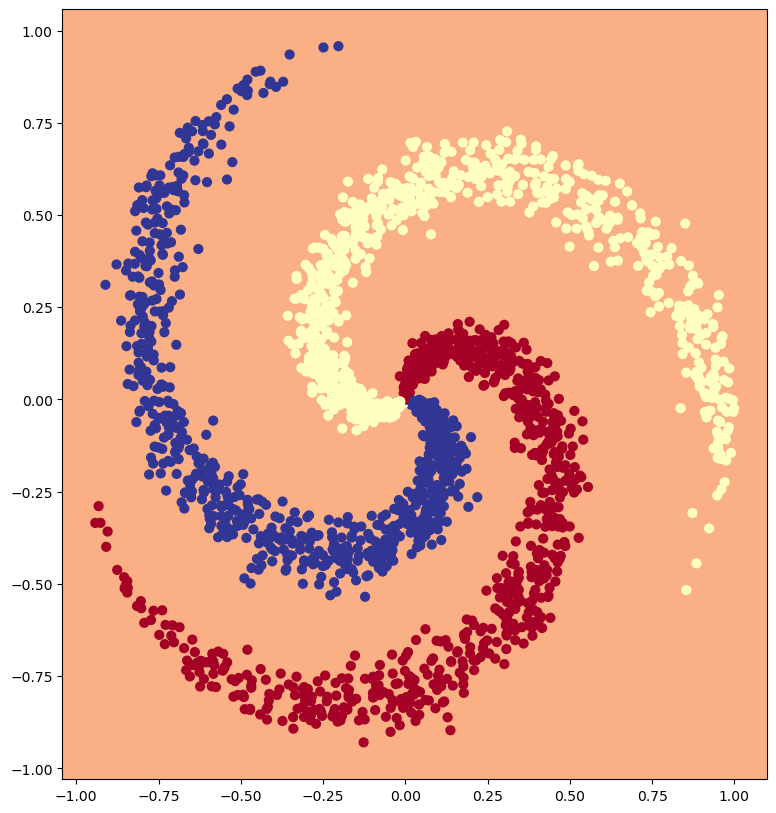

In [82]:
from helper_functions import plot_decision_boundary
#plot model
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plot_decision_boundary(model4, X_train, y_train)

In [83]:

# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

class SpiralModel(nn.Module): 
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

model_1 = SpiralModel().to(device)
model_1

SpiralModel(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [85]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Print out untrained model outputs
print("Logits:")
print(model_1(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_1(X_train)[:10], dim=1))

print("Pred labels:")
print(torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1))

torch.float32 torch.float32 torch.float32 torch.float32
Logits:
tensor([[-0.2642,  0.1077, -0.3101],
        [-0.2545,  0.1135, -0.3154],
        [-0.3243,  0.0024, -0.2771],
        [-0.3557, -0.0583, -0.2677],
        [-0.3222,  0.0122, -0.2756],
        [-0.3457, -0.0725, -0.2981],
        [-0.2540,  0.1213, -0.3202],
        [-0.3547, -0.0741, -0.2811],
        [-0.3403, -0.0068, -0.3266],
        [-0.2919,  0.0653, -0.2927]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.2936, 0.4259, 0.2805],
        [0.2953, 0.4267, 0.2779],
        [0.2911, 0.4036, 0.3052],
        [0.2908, 0.3916, 0.3176],
        [0.2903, 0.4056, 0.3041],
        [0.2974, 0.3908, 0.3119],
        [0.2949, 0.4292, 0.2760],
        [0.2941, 0.3894, 0.3166],
        [0.2933, 0.4094, 0.2973],
        [0.2917, 0.4169, 0.2914]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')


In [88]:

# Build a training loop for the model
epochs = 1000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train.type(torch.LongTensor).to(device))
  acc = accuracy_fn(y_pred, y_train)
  
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test.type(torch.LongTensor).to(device))
    test_acc = accuracy_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.12 Acc: 33.46 | Test loss: 1.13 Test acc: 32.83
Epoch: 100 | Loss: 1.12 Acc: 33.46 | Test loss: 1.13 Test acc: 32.83
Epoch: 200 | Loss: 1.12 Acc: 33.46 | Test loss: 1.13 Test acc: 32.83
Epoch: 300 | Loss: 1.12 Acc: 33.46 | Test loss: 1.13 Test acc: 32.83
Epoch: 400 | Loss: 1.12 Acc: 33.46 | Test loss: 1.13 Test acc: 32.83
Epoch: 500 | Loss: 1.12 Acc: 33.46 | Test loss: 1.13 Test acc: 32.83
Epoch: 600 | Loss: 1.12 Acc: 33.46 | Test loss: 1.13 Test acc: 32.83
Epoch: 700 | Loss: 1.12 Acc: 33.46 | Test loss: 1.13 Test acc: 32.83
Epoch: 800 | Loss: 1.12 Acc: 33.46 | Test loss: 1.13 Test acc: 32.83
Epoch: 900 | Loss: 1.12 Acc: 33.46 | Test loss: 1.13 Test acc: 32.83


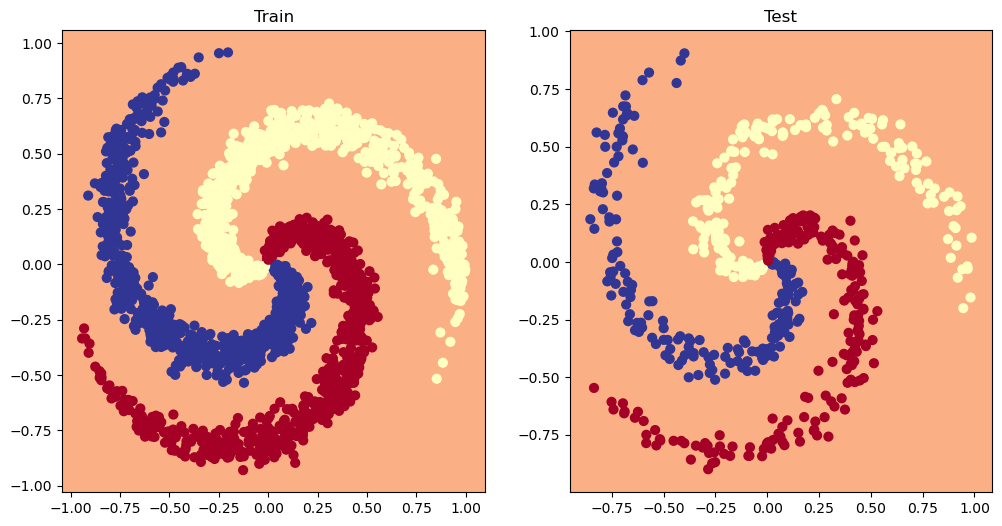

In [89]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)